<a href="https://colab.research.google.com/github/yogeshdhome/Coursera-IBM-AI-ML-Course/blob/master/Fake_News_Detection_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
fake = pd.read_csv('/content/sample_data/Fake.csv')
real = pd.read_csv('/content/sample_data/True.csv')

In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
fake.sample(5)

title  ...              date
6658    John Boehner Launches Blistering Attack On ‘M...  ...    April 28, 2016
17343  WATCH WHAT OUR US MILITARY DOES TO PEDOPHILIC ...  ...      May 14, 2015
21470  DC CHIEF OF POLICE DENIES CONCEALED WEAPONS PE...  ...       Sep 7, 2015
4138    CNN Host STUNNED As Trump Supporter Says Vote...  ...  October 18, 2016
9158   TREY GOWDY ON PETER STRZOK BIAS AGAINST TRUMP:...  ...      Dec 19, 2017

[5 rows x 4 columns]

In [ ]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [ ]:
real['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [ ]:
len(fake['text'].max())

1150

In [ ]:
len(real['text'].max())

3293

In [ ]:
fake['class'] = 0
real['class'] = 1

In [ ]:
real[real['text'] == ' ']

Empty DataFrame
Columns: [text, class]
Index: []

In [ ]:
fake[fake['text'] == ' ']

Empty DataFrame
Columns: [text, class]
Index: []

In [ ]:
fake = fake.drop(fake[fake['text'] == ' '].index, axis=0)

In [ ]:
real = real.drop(real[real['text'] == ' '].index, axis=0)

WordCloud Map (Data Visualization)

In [ ]:
from wordcloud import WordCloud

In [ ]:
fake_text = ' '.join(list(fake['text']))
real_text = ' '.join(list(real['text']))

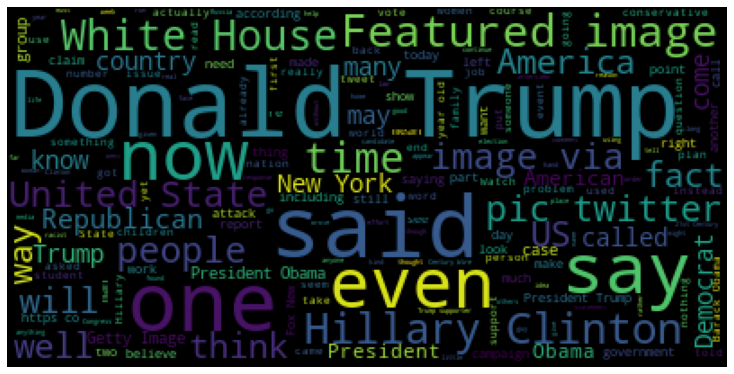

In [ ]:
wordcloud = WordCloud()
plt.figure(figsize=(10,8))
plt.imshow(wordcloud.generate(fake_text))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

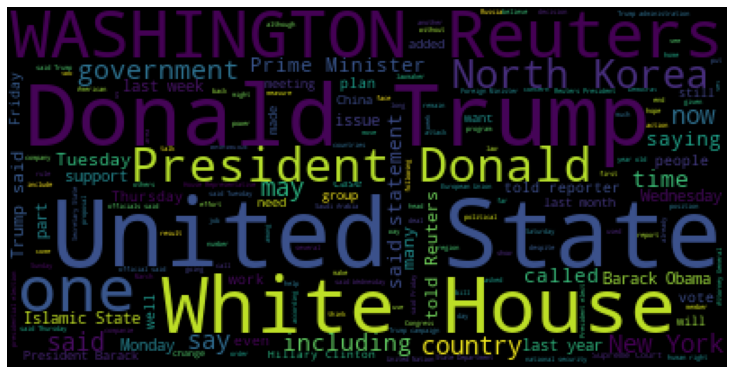

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud.generate(real_text))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#Text Pre-Processing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
ps = nltk.PorterStemmer()

In [ ]:
fake = fake.drop(['title','subject','date'], axis=1)
real = real.drop(['title','subject','date'], axis=1)

In [ ]:
dataset = fake.append(real, ignore_index=True)

In [ ]:
dataset['length']= dataset['text'].apply(len)
dataset.describe()

class        length
count  44271.000000  44271.000000
mean       0.483748   2504.064964
std        0.499741   2166.844598
min        0.000000      2.000000
25%        0.000000   1293.000000
50%        0.000000   2209.000000
75%        1.000000   3126.000000
max        1.000000  51794.000000

In [ ]:
sns.histplot(x='length',data=dataset,bins=50,hue='class')

In [ ]:
dataset.drop(index = dataset[dataset['length']>8000].index,axis=0,inplace=True)

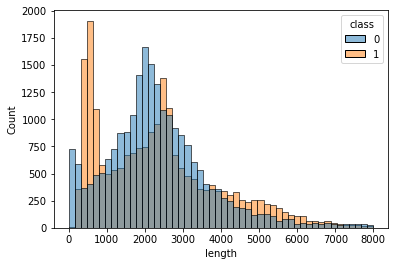

In [ ]:
sns.histplot(x='length',data=dataset,bins=50,hue='class')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f934d51d410>,
      dtype=object)

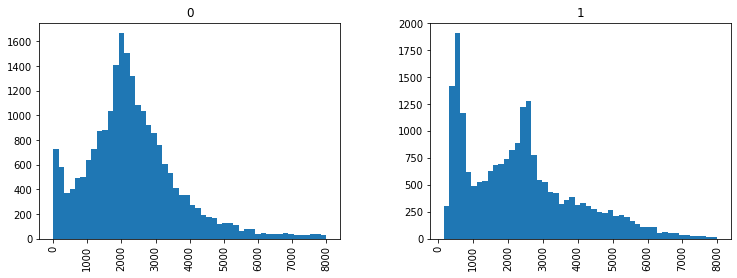

In [ ]:
dataset.hist(column='length', by='class', bins=50,figsize=(12,4))

In [ ]:
corpus = []

In [ ]:
def process_text(sentence):
  sentc = ''.join(re.sub('[^A-Za-z]+',' ',sentence))
  clean_sentc = [ps.stem(word.lower()) for word in sentc.split() if word.lower() not in stopwords.words('english')]
  corpus.append(' '.join(clean_sentc))
  return clean_sentc

In [ ]:
mess = 'i am loving $ % ^ & # @ ! *the NEW WAY9 89T ) of (working'
print(process_text(mess))

['love', 'new', 'way', 'work']


In [ ]:
dataset['class'].value_counts()

0    22284
1    21332
Name: class, dtype: int64

In [ ]:
dataset['clean_text'] = dataset['text'].apply(lambda x: process_text(x))

In [ ]:
 dataset['clean_text'].head()

0    [donald, trump, wish, american, happi, new, ye...
1    [hous, intellig, committe, chairman, devin, nu...
2    [friday, reveal, former, milwauke, sheriff, da...
3    [christma, day, donald, trump, announc, would,...
4    [pope, franci, use, annual, christma, day, mes...
Name: clean_text, dtype: object

In [ ]:
dataset_final = dataset.copy()

In [ ]:
dataset_final.drop(['text','length'],axis=1,inplace=True)

In [ ]:
dataset_final.reset_index(drop=True)

class                                         clean_text
0          0  [donald, trump, wish, american, happi, new, ye...
1          0  [hous, intellig, committe, chairman, devin, nu...
2          0  [friday, reveal, former, milwauke, sheriff, da...
3          0  [christma, day, donald, trump, announc, would,...
4          0  [pope, franci, use, annual, christma, day, mes...
...      ...                                                ...
44238      1  [brussel, reuter, nato, alli, tuesday, welcom,...
44239      1  [london, reuter, lexisnexi, provid, legal, reg...
44240      1  [minsk, reuter, shadow, disus, soviet, era, fa...
44241      1  [moscow, reuter, vatican, secretari, state, ca...
44242      1  [jakarta, reuter, indonesia, buy, sukhoi, figh...

[44243 rows x 2 columns]

In [ ]:
dataset_final = dataset_final.sample(frac=1).reset_index(drop=True)

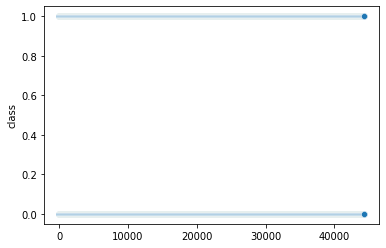

In [ ]:
sns.scatterplot(x=dataset.index,y='class',data=dataset_final)

In [ ]:
dataset_final = dataset_final.dropna()

In [ ]:
type(dataset_final['clean_text'][0])

list

In [ ]:
import gensim

In [ ]:
y = dataset_final['class'].values

In [ ]:
X = [item for item in dataset_final['clean_text'].tolist()]

In [ ]:
type(X[0])

list

In [ ]:
embedding_dim = 100
w2v_model = gensim.models.Word2Vec(sentences=X,size=embedding_dim,window=5,min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

86393

In [ ]:
w2v_model.wv.most_similar('modi')

[('narendra', 0.7659045457839966),
 ('abe', 0.627109706401825),
 ('najib', 0.6235668659210205),
 ('gujarat', 0.6013838052749634),
 ('india', 0.5906537771224976),
 ('xi', 0.5736819505691528),
 ('turnbul', 0.5679724216461182),
 ('sicili', 0.5656844973564148),
 ('bjp', 0.5418510437011719),
 ('bharatiya', 0.5413806438446045)]

In [ ]:
tokenizer = Tokenizer()


In [ ]:
tokenizer.fit_on_texts(X)

In [ ]:
X_tokenized = tokenizer.texts_to_sequences(X)

In [ ]:
max([len(x) for x in X_tokenized])

799

In [ ]:
tokenizer.word_index

{'trump': 1,
 'said': 2,
 'state': 3,
 'presid': 4,
 'u': 5,
 'would': 6,
 'peopl': 7,
 'year': 8,
 'republican': 9,
 'one': 10,
 'say': 11,
 'elect': 12,
 'reuter': 13,
 'new': 14,
 'also': 15,
 'govern': 16,
 'hous': 17,
 'like': 18,
 'donald': 19,
 'democrat': 20,
 'time': 21,
 'report': 22,
 'obama': 23,
 'clinton': 24,
 'nation': 25,
 'call': 26,
 'support': 27,
 'countri': 28,
 'unit': 29,
 'american': 30,
 'go': 31,
 'parti': 32,
 'campaign': 33,
 'right': 34,
 'senat': 35,
 'could': 36,
 'told': 37,
 'make': 38,
 'vote': 39,
 'white': 40,
 'offici': 41,
 'last': 42,
 'two': 43,
 'get': 44,
 'use': 45,
 'news': 46,
 'want': 47,
 'includ': 48,
 'offic': 49,
 'polit': 50,
 'work': 51,
 'law': 52,
 'take': 53,
 'back': 54,
 'group': 55,
 'first': 56,
 'washington': 57,
 'even': 58,
 'day': 59,
 'former': 60,
 'secur': 61,
 'week': 62,
 'show': 63,
 'court': 64,
 'hillari': 65,
 'plan': 66,
 'mani': 67,
 'come': 68,
 'may': 69,
 'need': 70,
 'attack': 71,
 'made': 72,
 'imag': 73,
 

In [ ]:
X = pad_sequences(X_tokenized,maxlen=800)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,output_dim=embedding_dim,input_length=800,trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 800, 100)          8639400   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 8,756,777
Trainable params: 117,377
Non-trainable params: 8,639,400
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,verbose=1)

Epoch 1/10
1091/1091 [==============================] - 58s 46ms/step - loss: 0.3922 - accuracy: 0.8249 - val_loss: 0.2963 - val_accuracy: 0.8746
Epoch 2/10
1091/1091 [==============================] - 46s 43ms/step - loss: 0.2781 - accuracy: 0.8832 - val_loss: 0.2154 - val_accuracy: 0.9192
Epoch 3/10
1091/1091 [==============================] - 48s 44ms/step - loss: 0.1785 - accuracy: 0.9319 - val_loss: 0.3257 - val_accuracy: 0.8475
Epoch 4/10
1091/1091 [==============================] - 49s 45ms/step - loss: 0.2742 - accuracy: 0.8844 - val_loss: 0.3692 - val_accuracy: 0.8433
Epoch 5/10
1091/1091 [==============================] - 48s 44ms/step - loss: 0.3485 - accuracy: 0.8465 - val_loss: 0.2925 - val_accuracy: 0.8732
Epoch 6/10
1091/1091 [==============================] - 48s 44ms/step - loss: 0.1439 - accuracy: 0.9463 - val_loss: 0.0465 - val_accuracy: 0.9862
Epoch 7/10
1091/1091 [==============================] - 50s 46ms/step - loss: 0.0276 - accuracy: 0.9915 - val_loss: 0.0244 -

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,(model.predict(X_test)>= 0.5).astype(int)))

[[4365   91]
 [  10 4258]]


In [ ]:
print(classification_report(y_test,(model.predict(X_test)>= 0.5).astype(int)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4456
           1       0.98      1.00      0.99      4268

    accuracy                           0.99      8724
   macro avg       0.99      0.99      0.99      8724
weighted avg       0.99      0.99      0.99      8724



In [ ]:
test_news = ['Because of the 280-character limit (140 characters in Japanese, Korean and Chinese), Twitter is often characterized as a microblogging service. But what if you need to tweet something thats longer than 280 characters? Here are two simple ways to send longer tweets without the use of third-party services']

In [ ]:
#test_news = process_text(test_news)

In [ ]:
test_news = tokenizer.texts_to_sequences(test_news)

In [ ]:
test_news = pad_sequences(test_news,maxlen=800)

In [ ]:
(model.predict(test_news) >=0.5).astype(int)

array([[0]])

In [ ]:
from keras.models import Sequential
from keras.layers import embeddings, LSTM, Dense, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot, Tokenizer
from sklearn.model_selection import train_test_split

In [ ]:
#vocab_size = 20000
max_length = 800
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 0.8 * (len(dataset))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset_final['clean_text'], dataset_final['class'], test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(35394,)

In [ ]:
y_train.shape

(35394,)

In [ ]:
temp = [len(item) for item in X_train.to_list()]

In [ ]:
X_train

24019                                                   []
9571     [time, everyth, crack, joke, kid, middl, addre...
34144    [rep, jason, smith, missouri, spent, intern, w...
13267    [hard, shame, someon, shame, live, virginia, v...
27779    [washington, reuter, presid, barack, obama, sa...
Name: clean_text, dtype: object

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)

In [ ]:
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
print(tokenizer.word_docs)

defaultdict(<class 'int'>, {'prime': 2594, 'request': 2620, 'reuter': 16191, 'accept': 2119, 'benediktsson': 8, 'vote': 6376, 'date': 1164, 'parti': 7176, 'parliamentari': 499, 'quit': 1433, 'minist': 4361, 'rule': 4788, 'nov': 1780, 'one': 15037, 'discuss': 3684, 'possibl': 4262, 'friday': 5042, 'reykjavik': 10, 'iceland': 36, 'bjarni': 8, 'saturday': 2416, 'coalit': 1356, 'elect': 9644, 'presid': 17839, 'said': 24194, 'call': 11381, 'snap': 274, 'denounc': 593, 'arrest': 1999, 'court': 4135, 'immedi': 2795, 'sunday': 3081, 'order': 4500, 'lead': 3997, 'nation': 10985, 'money': 3172, 'commun': 4109, 'insist': 1255, 'spanish': 349, 'group': 7181, 'though': 3533, 'illeg': 2486, 'spent': 1419, 'new': 11454, 'interior': 471, 'barcelona': 107, 'eastern': 899, 'unconstitut': 391, 'spain': 346, 'newspap': 1168, 'togeth': 2028, 'vanguardia': 21, 'take': 9583, 'arriv': 1428, 'liquid': 100, 'websit': 1538, 'local': 2563, 'box': 380, 'law': 6681, 'unstopp': 13, 'weekend': 1141, 'forn': 3, 'democ

In [ ]:
vocab_size = len(word_index)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train,maxlen=max_length,padding=padding_type,truncating=trunc_type)

X_test = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [ ]:
len(X_train_padded)

33182

In [ ]:
X_train = np.array(X_train_padded)
y_train = np.array(y_train)
X_test = np.array(X_test_padded)
y_test = np.array(y_test)

In [ ]:
model = Sequential()

In [ ]:
model.add(Embedding(vocab_size,embedding_dim,input_length=max_length))
model.add(LSTM(64))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 8000, 300)         22734300  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
_________________________________________________________________
embedding_2 (Embedding)      (None, 1, 300)            22734300  
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 45,781,882
Trainable params: 45,781,882
Non-trainable params: 0
__________________________________________

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,verbose=1,batch_size=128)

Epoch 1/5
260/260 [==============================] - 232s 884ms/step - loss: 0.6928 - accuracy: 0.5166 - val_loss: 0.6926 - val_accuracy: 0.5193
Epoch 2/5
260/260 [==============================] - 228s 877ms/step - loss: 0.6929 - accuracy: 0.5054 - val_loss: 0.6924 - val_accuracy: 0.5193
Epoch 3/5
260/260 [==============================] - 228s 876ms/step - loss: 0.6926 - accuracy: 0.5175 - val_loss: 0.6925 - val_accuracy: 0.5193
Epoch 4/5
136/260 [==============>...............] - ETA: 1:27 - loss: 0.6928 - accuracy: 0.5135

KeyboardInterrupt: ignored